In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Pearson.csv')
df

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [3]:
df.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [4]:
df.tail()

,Father,Son
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3
1077,70.3,67.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


In [7]:
df.shape

(1078, 2)

In [8]:
df.ndim

2

In [9]:
df.dtypes

Father    float64
Son       float64
dtype: object

In [10]:
df.isna().sum()

Father    0
Son       0
dtype: int64

In [11]:
x=df.iloc[:,:-1]
x

,Father
0,65.0
1,63.3
2,65.0
3,65.8
4,61.1
...,...
1073,67.0
1074,71.3
1075,71.8
1076,70.7


In [13]:
y=df.iloc[:,-1]
y

0       59.8
1       63.2
2       63.3
3       62.8
4       64.3
        ... 
1073    70.8
1074    68.3
1075    69.3
1076    69.3
1077    67.0
Name: Son, Length: 1078, dtype: float64

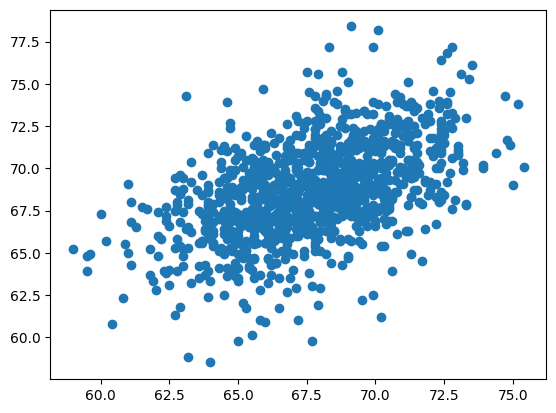

In [37]:
plt.scatter(x,y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train


,Father
259,65.4
204,62.7
427,72.0
720,64.3
836,68.0
...,...
330,67.3
466,67.6
121,69.2
1044,69.3


In [17]:
x_test

,Father
423,73.9
548,67.9
837,67.8
587,72.8
864,65.0
...,...
457,64.6
71,72.8
94,69.3
33,67.9


In [18]:
y_train

259     67.3
204     61.3
427     69.2
720     68.4
836     73.1
        ... 
330     68.9
466     66.3
121     68.9
1044    71.9
860     61.7
Name: Son, Length: 754, dtype: float64

In [19]:
y_test

423    70.0
548    69.0
837    73.6
587    70.6
864    63.5
       ... 
457    66.1
71     67.6
94     68.3
33     65.8
684    66.6
Name: Son, Length: 324, dtype: float64

In [20]:
#model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([71.94127637, 68.8170954 , 68.76502572, 71.36850986, 67.3070746 ,
       69.96262842, 69.28572255, 70.17090716, 70.58746462, 68.19225921,
       70.06676779, 69.96262842, 71.73299764, 67.04672618, 69.70228001,
       67.93191079, 69.07744382, 68.66088635, 70.27504652, 67.67156238,
       67.72363206, 69.91055874, 67.82777143, 70.37918589, 69.1295135 ,
       69.4419316 , 70.84781303, 70.74367367, 67.77570174, 67.61949269,
       68.03605016, 68.55674699, 67.46328365, 68.8170954 , 70.53539494,
       70.43125557, 67.72363206, 68.24432889, 69.54607096, 70.58746462,
       70.22297684, 68.55674699, 68.86916508, 68.86916508, 69.85848906,
       68.03605016, 68.71295604, 68.14018952, 67.87984111, 68.55674699,
       69.85848906, 69.02537413, 69.07744382, 70.3271162 , 69.65021033,
       67.15086555, 69.49400128, 69.02537413, 66.36982031, 67.87984111,
       68.66088635, 69.70228001, 64.44324204, 66.52602935, 67.35914428,
       69.85848906, 67.82777143, 67.09879587, 69.85848906, 71.47

In [21]:
y_test

423    70.0
548    69.0
837    73.6
587    70.6
864    63.5
       ... 
457    66.1
71     67.6
94     68.3
33     65.8
684    66.6
Name: Son, Length: 324, dtype: float64

In [23]:
print(model.predict([[67.0]]))

[68.34846826]


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


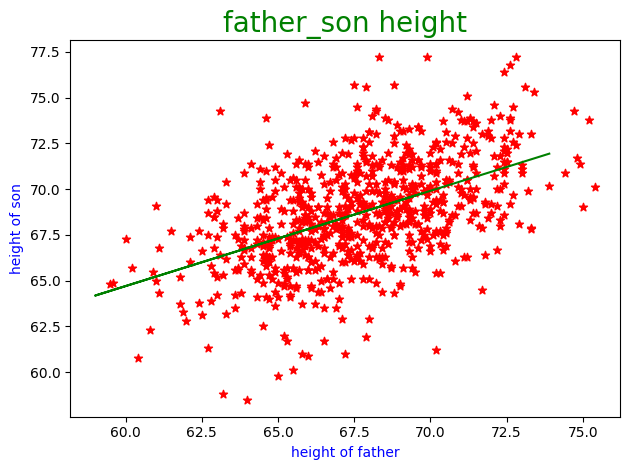

In [40]:
plt.scatter(x_train,y_train,marker='*',color='r')
plt.plot(x_test,y_pred,color='g')
plt.xlabel('height of father',color='b')
plt.ylabel('height of son',color='b')
plt.title('father_son height',color='g',size=20)
plt.tight_layout()




In [24]:
#slopw
print('slope is',model.coef_)

slope is [0.52069683]


In [25]:
#constant
print('constant is',model.intercept_)

constant is 33.46178072537135


In [26]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.8566674766330689

In [27]:
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.027171124377887986

In [28]:
MSE=mean_squared_error(y_test,y_pred)
MSE

5.667989246087993

In [29]:
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

2.380753923883775

In [30]:
r2score=r2_score(y_test,y_pred)
r2score

0.221141945892383

In [31]:
#dataframe
df1=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred})
df1

,actual_value,predicted_value,difference
423,70.0,71.941276,-1.941276
548,69.0,68.817095,0.182905
837,73.6,68.765026,4.834974
587,70.6,71.368510,-0.768510
864,63.5,67.307075,-3.807075
...,...,...,...
457,66.1,67.098796,-0.998796
71,67.6,71.368510,-3.768510
94,68.3,69.546071,-1.246071
33,65.8,68.817095,-3.017095
